In [4]:
import os
import geopandas as gpd
import glob
import pandas as pd
# Path to the three folders
shapefile_dir = r"D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles"
folders = [
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_0"),
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_1"),
    os.path.join(shapefile_dir, "WDPA_WDOECM_Jul2025_Public_marine_shp_2")
]

# Load and merge all polygon shapefiles
all_gdfs = []
for folder in folders:
    shp_path = glob.glob(os.path.join(folder, "*-polygons.shp"))
    if shp_path:
        gdf = gpd.read_file(shp_path[0])
        all_gdfs.append(gdf)
        print(f"✅ Loaded: {shp_path[0]}")

# Concatenate into one GeoDataFrame
merged_gdf = gpd.GeoDataFrame(pd.concat(all_gdfs, ignore_index=True), crs=all_gdfs[0].crs)

# Save merged file
output_dir = os.path.join(shapefile_dir, "mpa_zones")
os.makedirs(output_dir, exist_ok=True)
merged_path = os.path.join(output_dir, "mpa_merged.shp")
merged_gdf.to_file(merged_path)

print(f"\n🎉 Merged MPA shapefile saved to: {merged_path}")


✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_0\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp
✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_1\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp
✅ Loaded: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\WDPA_WDOECM_Jul2025_Public_marine_shp_2\WDPA_WDOECM_Jul2025_Public_marine_shp-polygons.shp


d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510252 of field WDPAID of feature 6648 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510273 of field WDPAID of feature 6649 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510365 of field WDPAID of feature 6650 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 555510628 of field WDPAID of feature 6651 not successfully written. Possibly due to too larger number with respect to f


🎉 Merged MPA shapefile saved to: D:\Projects\Hackathon\Agentic Hackathon\geospatial\geofencing\shapefiles\mpa_zones\mpa_merged.shp


C:\Users\altaf\AppData\Local\Temp\ipykernel_51676\632612897.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
d:\Projects\Hackathon\Agentic Hackathon\illegal_fish\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


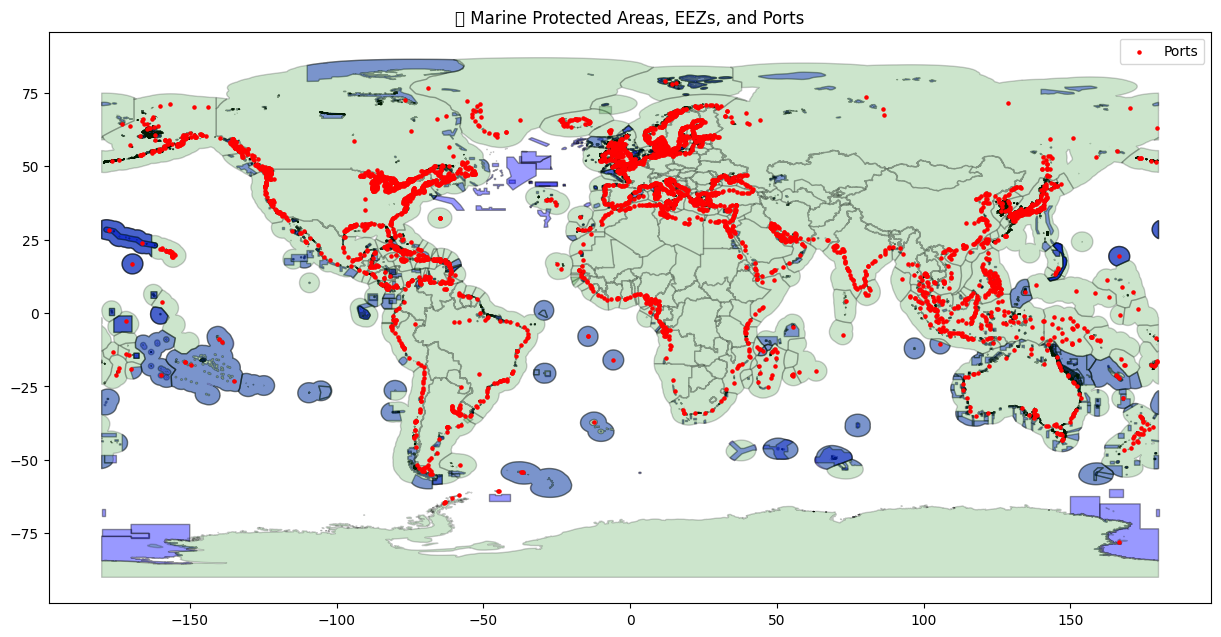

In [ ]:
# Cell: Load and Visualize Shapefiles
import geopandas as gpd
import matplotlib.pyplot as plt

# Load all zones
mpa = gpd.read_file("mpa_zones")
eez = gpd.read_file("eez_zones")
ports = gpd.read_file("ports")

# Plot all zones
fig, ax = plt.subplots(figsize=(15, 10))
mpa.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k', label='MPA')
eez.plot(ax=ax, color='green', alpha=0.2, edgecolor='black', label='EEZ')
ports.plot(ax=ax, color='red', markersize=5, label='Ports')
plt.legend()
plt.title("🌍 Marine Protected Areas, EEZs, and Ports")
plt.show()


In [1]:
import os
from pathlib import Path

# Navigate back to your project root
os.chdir(Path.cwd().parents[2])
print("✅ Current working directory:", os.getcwd())


✅ Current working directory: d:\Projects\Hackathon\Agentic Hackathon


In [2]:
from geospatial.geofencing.fence_utils import load_zone_shapefiles, assign_zone
import pandas as pd

# ✅ Load your shapefiles (MPA, EEZ, Ports)
zones = load_zone_shapefiles()

# ✅ Example: Simulate model output DataFrame with required columns
# In your actual case, replace this with real model predictions
df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

df = assign_zone(df, zones['mpa'], 'in_mpa', lon_col="longitude", lat_col="latitude")
df['illegal_fishing'] = (df['in_mpa']) & (df['behavior'] == 'fishing')
df.head()



longitude  latitude     behavior  in_mpa  illegal_fishing
0       73.5      15.4      fishing   False            False
1       78.9      12.7  non-fishing   False            False

In [ ]:
from geospatial.geofencing.fence_utils import load_zone_shapefiles, assign_zone
import pandas as pd

# ✅ Load shapefiles
zones = load_zone_shapefiles()

# ✅ Simulated vessel predictions
df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

# ✅ Assign all zones
df = assign_zone(df, zones['mpa'], 'in_mpa', lon_col="longitude", lat_col="latitude")
df = assign_zone(df, zones['eez'], 'in_eez', lon_col="longitude", lat_col="latitude")
df = assign_zone(df, zones['ports'], 'near_port', lon_col="longitude", lat_col="latitude")

# ✅ Mark illegal fishing
df['illegal_fishing'] = (df['in_mpa']) & (df['behavior'] == 'fishing')

df.head()

longitude  latitude     behavior  in_mpa  in_eez  near_port  \
0       73.5      15.4      fishing   False    True      False   
1       78.9      12.7  non-fishing   False    True      False   

   illegal_fishing  
0            False  
1            False

In [7]:
from geospatial.zone_violation_detector.detect_violation import detect_illegal_behavior

import pandas as pd

df = pd.DataFrame({
    'longitude': [73.5, 78.9],
    'latitude': [15.4, 12.7],
    'behavior': ['fishing', 'non-fishing']
})

result = detect_illegal_behavior(df)
print(result[['longitude', 'latitude', 'behavior', 'in_mpa', 'illegal_fishing']])


   longitude  latitude     behavior  in_mpa  illegal_fishing
0       73.5      15.4      fishing   False            False
1       78.9      12.7  non-fishing   False            False


C:\Users\altaf\AppData\Local\Temp\ipykernel_61908\2818052446.py:76: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='upper right', fontsize=14, frameon=True,
C:\Users\altaf\AppData\Local\Temp\ipykernel_61908\2818052446.py:95: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\altaf\AppData\Local\Temp\ipykernel_61908\2818052446.py:98: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig('marine_zones_water_map.png', dpi=600, bbox_inches='tight',
C:\Users\altaf\AppData\Local\Temp\ipykernel_61908\2818052446.py:101: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.savefig('marine_zones_water_map.pdf', dpi=600, bbox_inches='tight',
C:\Users\altaf\AppData\Local\Temp\ipykernel_619

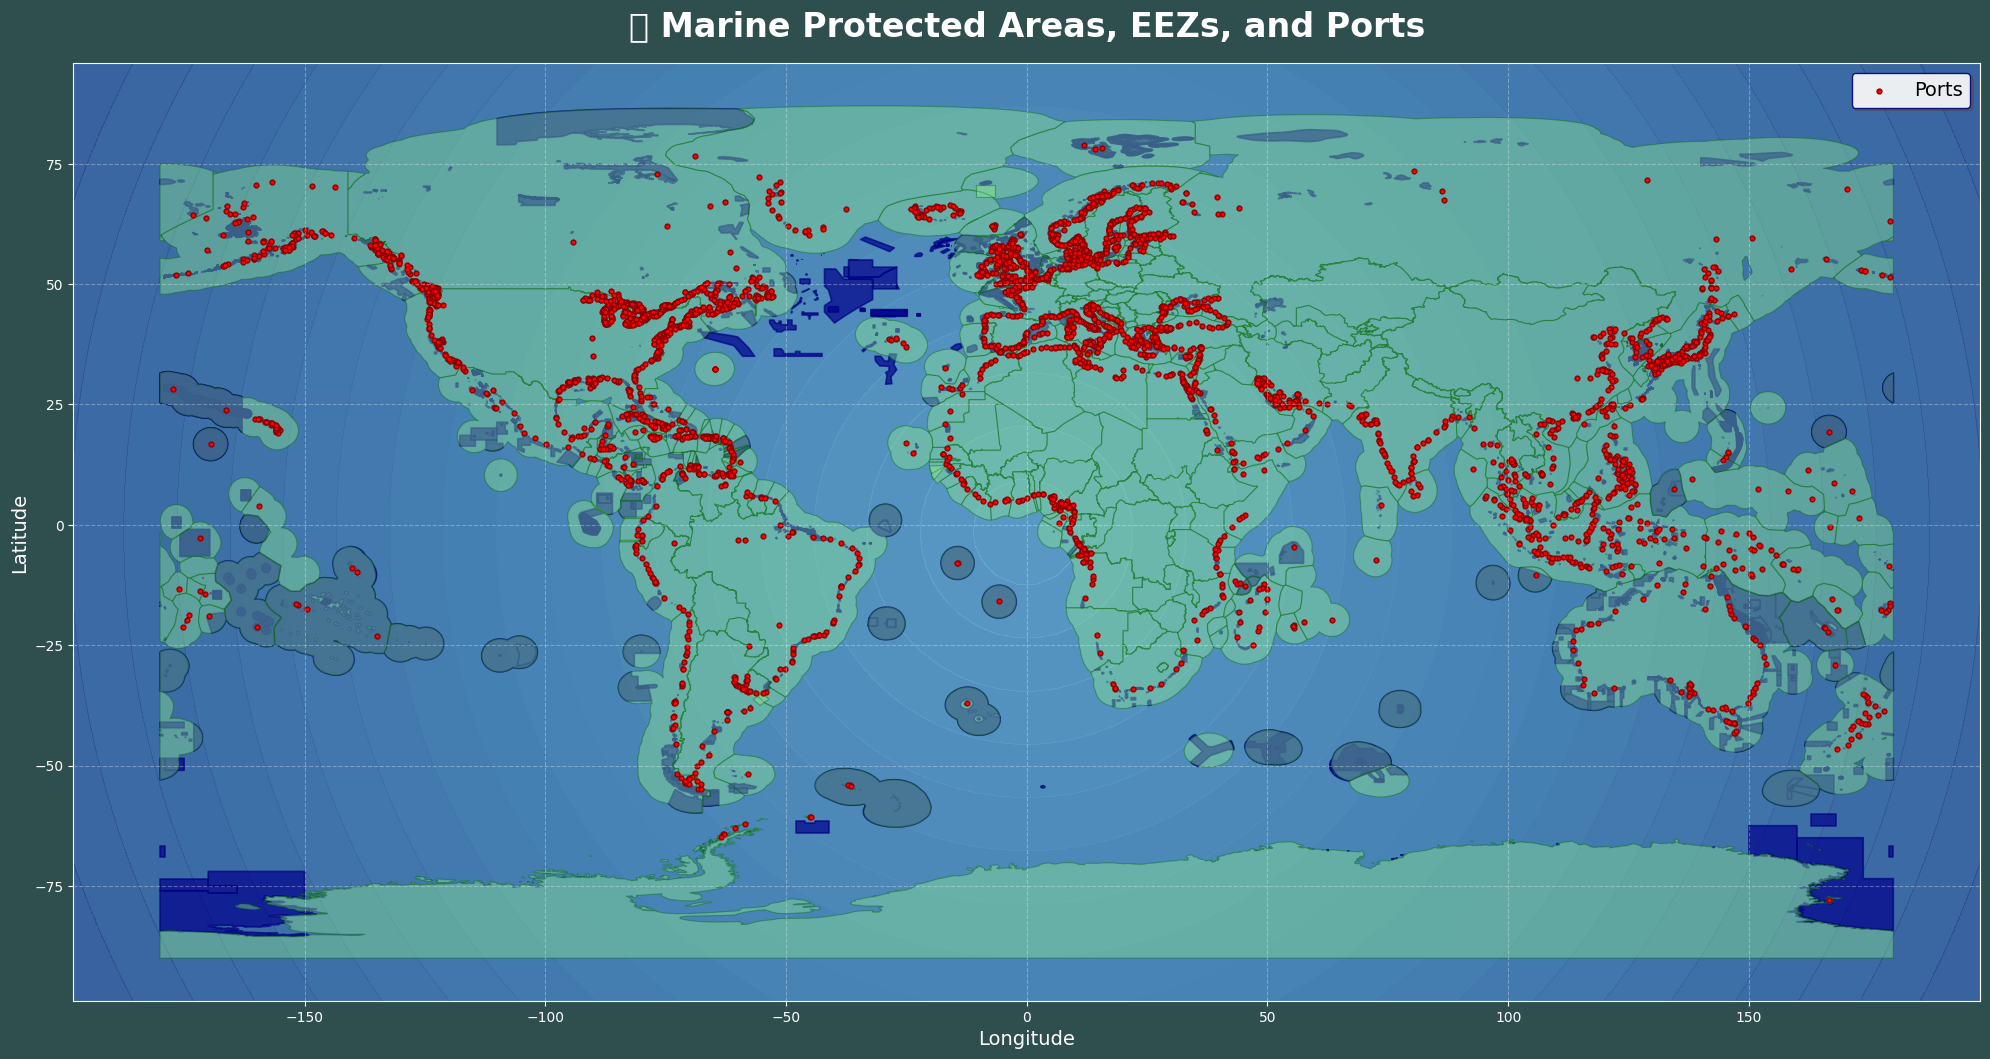

✅ Water-themed map saved as 'marine_zones_water_map.png' and 'marine_zones_water_map.pdf' with 600 DPI


In [1]:
# Cell: Load and Visualize Shapefiles with Custom Water Background
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load all zones
mpa = gpd.read_file("mpa_zones")
eez = gpd.read_file("eez_zones")
ports = gpd.read_file("ports")

# Create the plot with blue water background
fig, ax = plt.subplots(figsize=(20, 15))

# Set the background color to ocean blue
ax.set_facecolor('#4682B4')  # Steel blue for water

# Get the bounds of all data combined
all_bounds = []
for gdf in [mpa, eez, ports]:
    if not gdf.empty:
        all_bounds.append(gdf.total_bounds)

if all_bounds:
    # Calculate overall bounds
    minx = min(bounds[0] for bounds in all_bounds)
    miny = min(bounds[1] for bounds in all_bounds)
    maxx = max(bounds[2] for bounds in all_bounds)
    maxy = max(bounds[3] for bounds in all_bounds)
    
    # Add some padding
    padding = 0.05
    x_pad = (maxx - minx) * padding
    y_pad = (maxy - miny) * padding
    
    ax.set_xlim(minx - x_pad, maxx + x_pad)
    ax.set_ylim(miny - y_pad, maxy + y_pad)

# Plot the zones with enhanced styling
mpa.plot(ax=ax, color='darkblue', alpha=0.7, edgecolor='navy', 
         linewidth=1.2, label='Marine Protected Areas')
eez.plot(ax=ax, color='lightgreen', alpha=0.4, edgecolor='darkgreen', 
         linewidth=0.8, label='Exclusive Economic Zones')
ports.plot(ax=ax, color='red', markersize=12, label='Ports', 
           marker='o', edgecolor='darkred', linewidth=1)

# Add coastline effect (if you have land polygons)
# This creates a more realistic water appearance
x_range = ax.get_xlim()
y_range = ax.get_ylim()

# Create a gradient effect for water depth
x_gradient = np.linspace(x_range[0], x_range[1], 100)
y_gradient = np.linspace(y_range[0], y_range[1], 100)
X, Y = np.meshgrid(x_gradient, y_gradient)

# Simple depth gradient (lighter blue near coast, darker offshore)
Z = np.sqrt((X - np.mean(x_gradient))**2 + (Y - np.mean(y_gradient))**2)
Z = Z / np.max(Z)  # Normalize

# Create custom colormap for water
water_colors = ['#87CEEB', '#4682B4', '#191970']  # Light blue to dark blue
n_bins = 50
water_cmap = LinearSegmentedColormap.from_list('water', water_colors, N=n_bins)

# Add water gradient as background
ax.contourf(X, Y, Z, levels=20, cmap=water_cmap, alpha=0.3, zorder=0)

# Customize the plot
ax.set_title("🌍 Marine Protected Areas, EEZs, and Ports", 
             fontsize=24, fontweight='bold', pad=20, color='white')
ax.set_xlabel("Longitude", fontsize=14, color='white')
ax.set_ylabel("Latitude", fontsize=14, color='white')

# Style the legend
legend = ax.legend(loc='upper right', fontsize=14, frameon=True, 
                  fancybox=True, shadow=True, framealpha=0.9)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('navy')

# Style the axes
ax.tick_params(colors='white', which='both')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Add a subtle grid
ax.grid(True, alpha=0.3, linestyle='--', color='white')

# Set figure background to dark blue
fig.patch.set_facecolor('#2F4F4F')

# Adjust layout
plt.tight_layout()

# Save the figure with high DPI
plt.savefig('marine_zones_water_map.png', dpi=600, bbox_inches='tight', 
            facecolor='#2F4F4F', edgecolor='none', format='png')

plt.savefig('marine_zones_water_map.pdf', dpi=600, bbox_inches='tight', 
            facecolor='#2F4F4F', edgecolor='none', format='pdf')

plt.show()

print("✅ Water-themed map saved as 'marine_zones_water_map.png' and 'marine_zones_water_map.pdf' with 600 DPI")